<a href="https://colab.research.google.com/github/ranggasatria59/Prediksi-Pengurangan-Karyawan-Menggunakan-Machine-Learning/blob/main/Prediksi_Pengurangan_Karyawan_Menggunakan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import semua library dulu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Load dataset dari CSV
df = pd.read_csv('dataset_employee.csv')

# Menampilkan 5 data teratas
df.head()


,EmployeeID,Age,JobSatisfaction,Salary,WorkingHours,Attrition
0,1,34,4,70000,40,0
1,2,29,2,45000,45,1
2,3,42,5,90000,50,0
3,4,25,3,52000,38,1
4,5,37,4,67000,42,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   EmployeeID       10 non-null     int64
 1   Age              10 non-null     int64
 2   JobSatisfaction  10 non-null     int64
 3   Salary           10 non-null     int64
 4   WorkingHours     10 non-null     int64
 5   Attrition        10 non-null     int64
dtypes: int64(6)
memory usage: 608.0 bytes


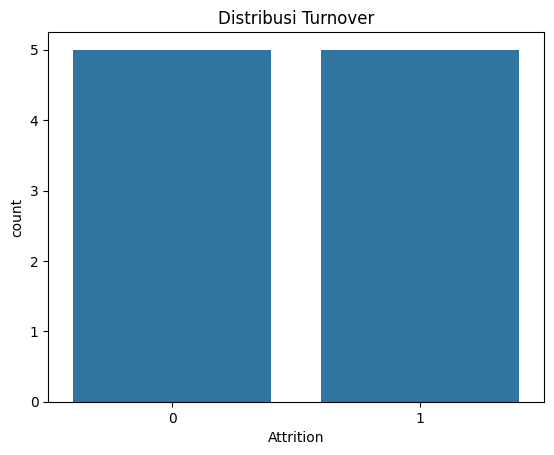

In [7]:
# Informasi tentang dataset
df.info()

# Statistik dasar
df.describe()

# Visualisasi distribusi variabel target (Turnover/Attrition)
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Turnover')
plt.show()


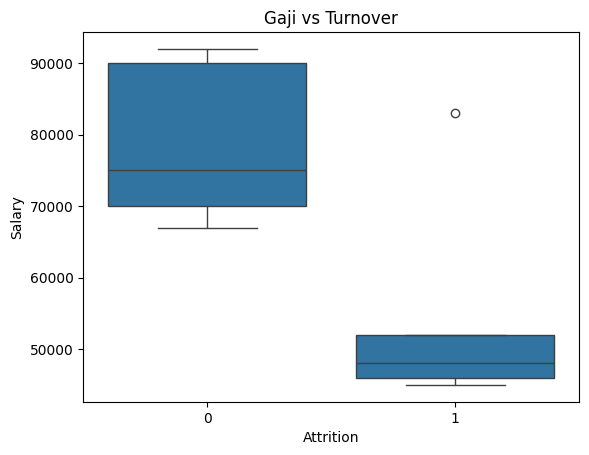

In [9]:
sns.boxplot(x='Attrition', y='Salary', data=df)
plt.title('Gaji vs Turnover')
plt.show()


In [10]:
# Mengubah variabel kategorikal
df = pd.get_dummies(df, drop_first=True)

# Memisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Membuat model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model Logistic Regression
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logreg))

# Akurasi model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Akurasi Logistic Regression: {accuracy_logreg * 100:.2f}%')


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Akurasi Logistic Regression: 66.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [12]:
# Membuat model Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Prediksi
y_pred_tree = tree.predict(X_test)

# Evaluasi model Decision Tree
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_tree))

# Akurasi model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Akurasi Decision Tree: {accuracy_tree * 100:.2f}%')


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Akurasi Decision Tree: 100.00%


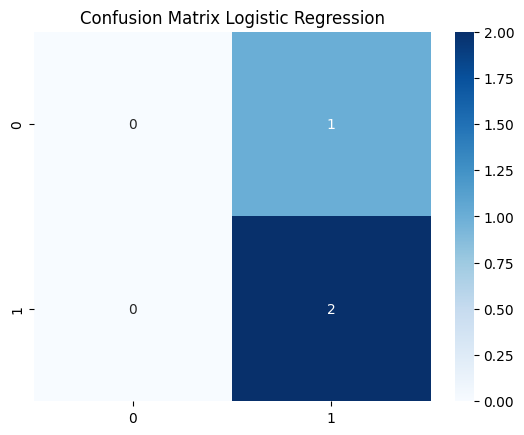

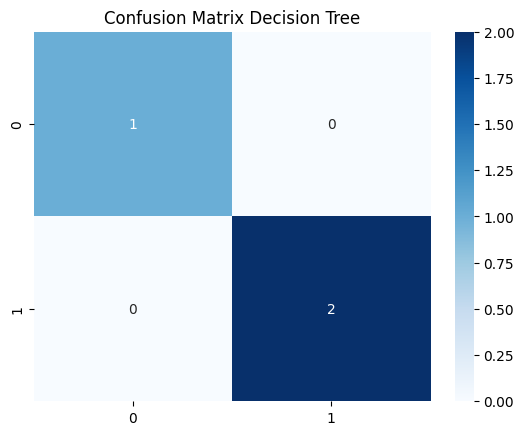

In [13]:
# Visualisasi confusion matrix untuk Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# Visualisasi confusion matrix untuk Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Decision Tree')
plt.show()
